## Problem-1

For this problem, we will be using the `tf2_engineer.jpg` image to demonstrate basic image reading, pixel manipulation, and drawing.

In [1]:
import cv2
import matplotlib.pyplot as plt

def show_image(img, title='', cmap_type=None):
    """Helper function to display images using Matplotlib in Jupyter."""
    plt.figure(figsize=(8, 6))
    if len(img.shape) == 3 and img.shape[2] == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap=cmap_type)
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

### 1. Read and display the original image in colour
We start by loading the `tf2_engineer.jpg` image using OpenCV's `imread` function and display it using our custom `show_image` helper.

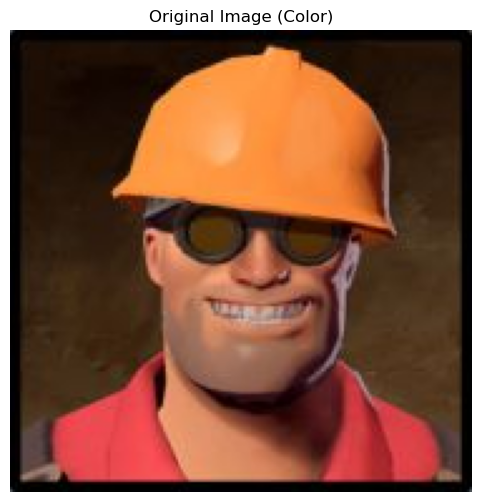

In [2]:
img1 = cv2.imread('tf2_engineer.jpg')
show_image(img1, title='Original Image (Color)', cmap_type=None)

### 2. Find the center of the image and print intensity value

Here, we determine the center coordinates (row `yc`, column `xc`) of the image. The image dimensions are obtained using `img1.shape`. We then access and print the intensity (BGR) value of the pixel at this exact center.

In [3]:
h, w, _ = img1.shape
yc, xc = h // 2, w // 2 # Integer division to get center coordinates
center_pixel = img1[yc, xc]
print(f"Image center coordinates (yc, xc): ({yc}, {xc})")
print(f"Intensity at center (BGR): {center_pixel}")

Image center coordinates (yc, xc): (92, 92)
Intensity at center (BGR): [ 67  92 172]


### 3. Place a rectangular colour patch around the centre

We will draw a solid rectangular color patch on the image. The patch will be centered and have a height of 30 pixels and a width of 40 pixels. The specified hex color `#329ea8` is converted to its BGR equivalent for OpenCV (Blue: 168, Green: 158, Red: 50). We use `img1.copy()` to avoid modifying the original image directly.

In [6]:
# Convert hex color #329ea8 to BGR:
# Hex: #329ea8 -> R: 50, G: 158, B: 168
# BGR for OpenCV: (168, 158, 50)
patch_color = (168, 158, 50)
patch_h, patch_w = 30, 40

# Calculate top left and bottom right corners of the patch
# Ensure the patch is centered by offsetting from the image center
top_left_x = xc - patch_w //2
top_left_y = yc - patch_h //2
bottom_right_x = xc + patch_w //2
bottom_right_y = yc + patch_h // 2

top_left = (top_left_x, top_left_y)
bottom_right = (bottom_right_x, bottom_right_y)

# Create a copy of the original image to draw on
img1_with_patch = img1.copy()

# Draw a filled rectangle (thickness= -1)
cv2.rectangle(img1_with_patch, top_left, bottom_right, patch_color, thickness=-1)

array([[[82, 77, 74],
        [30, 25, 22],
        [ 4,  0,  0],
        ...,
        [ 0,  0,  0],
        [24, 26, 27],
        [76, 78, 79]],

       [[36, 31, 28],
        [ 4,  1,  0],
        [ 4,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  1,  2],
        [29, 31, 32]],

       [[ 5,  1,  0],
        [ 4,  0,  0],
        [ 4,  0,  0],
        ...,
        [ 0,  0,  1],
        [ 0,  0,  1],
        [ 0,  1,  2]],

       ...,

       [[ 4,  2,  0],
        [ 4,  1,  0],
        [12, 11,  7],
        ...,
        [ 6,  4,  4],
        [ 4,  1,  0],
        [ 5,  2,  0]],

       [[34, 30, 25],
        [ 4,  1,  0],
        [ 7,  6,  2],
        ...,
        [ 5,  2,  0],
        [ 4,  1,  0],
        [39, 35, 30]],

       [[83, 79, 74],
        [26, 23, 18],
        [ 8,  5,  1],
        ...,
        [ 6,  3,  0],
        [25, 21, 16],
        [83, 79, 74]]], dtype=uint8)

### 4. Print the intensity value at the centre of the colour patch

Now, we will retrieve and print the intensity value of the pixel at the exact center of the newly placed color patch. Since the patch was centered around the image's center, we can use the same `(yc, xc)` coordinates on the `img1_with_patch` image.

In [8]:
patch_center_pixel = img1_with_patch[yc, xc]
print(f"Intensity at center of patch (BGR): {patch_center_pixel}")

Intensity at center of patch (BGR): [168 158  50]


### 5. Display the new image with color patch

Finally, we display the image after the color patch has been applied. You should see the specified rectangular patch at the center of the `tf2_engineer.jpg` image.

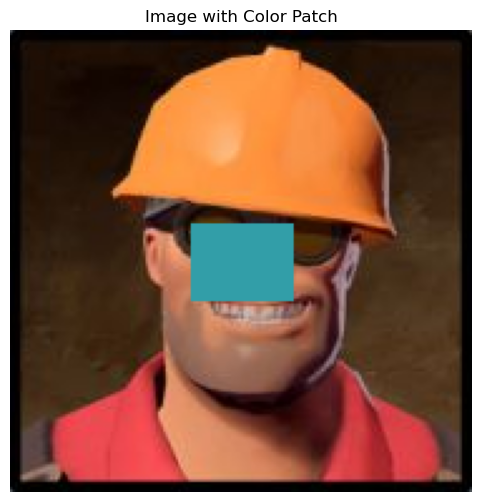

In [9]:
show_image(img1_with_patch, title='Image with Color Patch', cmap_type=None)

Problem-2: einstein.tiff
This problem focuses on a fundamental intensity transformation: image negation. We will also demonstrate how pixel values change after this transformation by examining random pixels.

1. Read and display the original image in grayscale
We begin by loading the einstein.tiff image. Since intensity transformations like negation operate on pixel brightness, loading the image in grayscale (single channel) simplifies the process. We also include a check to ensure the image file is found and loaded correctly before proceeding.

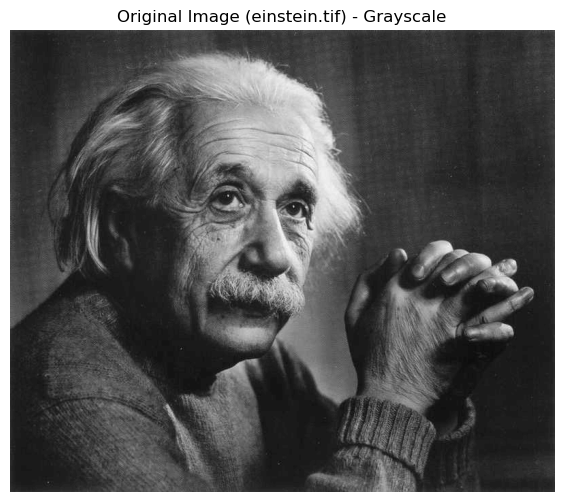

In [11]:
img2 = cv2.imread('einstein.tif', cv2.IMREAD_GRAYSCALE)

if img2 is None:
    print("Error: Image 'einstein.tif' not found. Please ensure it's in the correct directory.")
else:
    show_image(img2, title='Original Image (einstein.tif) - Grayscale')

2. Find the negative of the input image
The negative of an image inverts its intensity levels. For an 8-bit grayscale image (where pixel values range from 0 to 255), this transformation is calculated by subtracting each pixel's intensity from the maximum intensity value (255). This means dark areas become bright, and bright areas become dark.

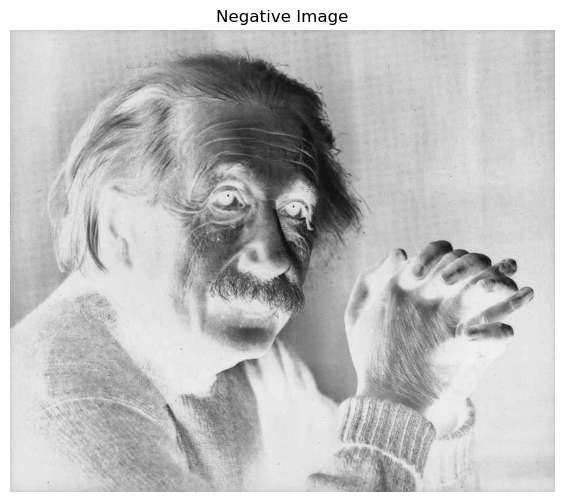

In [19]:
# 2. Find the negative of the image
# For an 8-bit image (0-255), the negative 255
negative_img2 = 255 - img2

# 3. Display the negative image
show_image(negative_img2, title='Negative Image')

4. From the original image, get the intensity value of 5 random pixels, and from the negative image, get the intensity value of same pixels. Print pixel values to show pixel values before and after.


To quantitatively illustrate the effect of the negative transformation, we will select five random pixel locations within the image. For each selected location,we will retrieve and print its intensity value from both the original grayscale image and the negative image . This demonstrates the (255 - r) relationship for individual pixel intensities.

In [18]:
import random 

h2, w2 = img2.shape 

random_pixels = [(random.randint(0, h2 - 1), random.randint(0, w2 - 1)) for _ in range(5)]

print("Pixel intensities (Original vs Negative):")
for y, x in random_pixels: # y is row, x is column
    original_val = img2[y, x]
    negative_val = negative_img2[y, x]
    print(f"Pixel ({y},{x}): Original = {original_val}, Negative = {negative_val}")

Pixel intensities (Original vs Negative):
Pixel (606,236): Original = 105, Negative = 150
Pixel (465,175): Original = 96, Negative = 159
Pixel (650,387): Original = 97, Negative = 158
Pixel (59,107): Original = 105, Negative = 150
Pixel (468,762): Original = 97, Negative = 158


....................................................................................................

Problem_3: pout.tiff

For this problem,we will explore intensity transformations , specifically the Log and Inverse Log transforms , using the pout.tiff image. These transformations are useful for image enhancement, particularly for expanding the intensity levels in dark regions of an image.

1. Read and display the original image in grayscale
 
We begin by loading the pout.tiff image. As this problem focuses on intensity transformations, we load it in grayscale to simplify the pixel value manipulations.

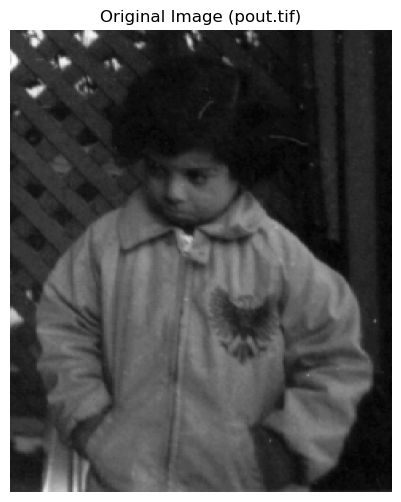

In [36]:
# 1. Read the grayscale image
img3 = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if img3 is None:
    print("Error: Image 'pout.tif' not found. Please make sure the file is in the correct directory.")
else:
    show_image(img3, title='Original Image (pout.tif)', cmap_type='gray')


2. Apply log transform to original image and display the result

The log transformation is used to expand the values of dark pixels in an image while compressing the values of brighter pixels. This can enhance details in the darker regions. The formula is s = c * log(1 + r), where r is the input pixel intensity and c is a scaling constant. For 8-bit images (pixel values 0-255), a common c value is 255 / log(1 + 255).

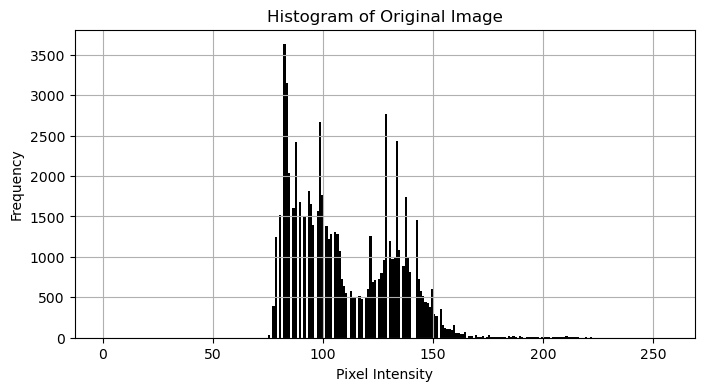

In [37]:
# 2. Display the histogram of the original image
plt.figure(figsize=(8, 4))
plt.hist(img3.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


3. Apply inverse log transform to original image and display the result
   
The inverse log transform (also known as exponential transform) performs the opposite operation of the log transform. It compresses dark pixel values and expands brighter pixel values. The formula is s = (exp(r / c) - 1). Applying this to the original image is mostly for demonstrating the effect, which will make dark areas darker and bright areas brighter.

In [38]:
# 3. Apply histogram equalization
equalized_img3 = cv2.equalizeHist(img3)


4. Display the histogram equalized image
Now that we’ve enhanced the image contrast through equalization, we display the new version of the image.

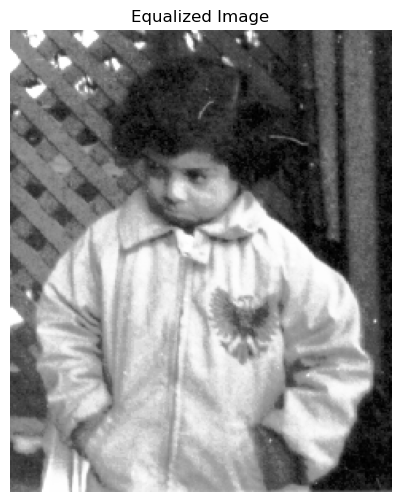

In [39]:
# 4. Display the equalized image
show_image(equalized_img3, title='Equalized Image', cmap_type='gray')


📈 5. Display the histogram of the equalized image
We visualize the intensity distribution after equalization. The histogram should now appear more spread out, indicating improved image contrast.

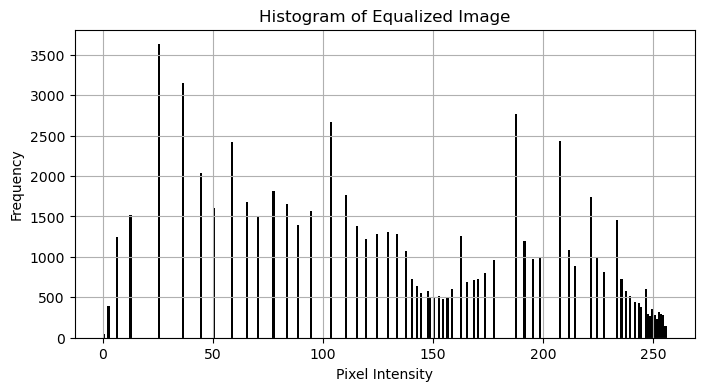

In [40]:
# 5. Display the histogram of the equalized image
plt.figure(figsize=(8, 4))
plt.hist(equalized_img3.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


 6. Compare the original and equalized images side by side
We display both images to compare them visually and understand the impact of histogram equalization.

python
Copy
Edit


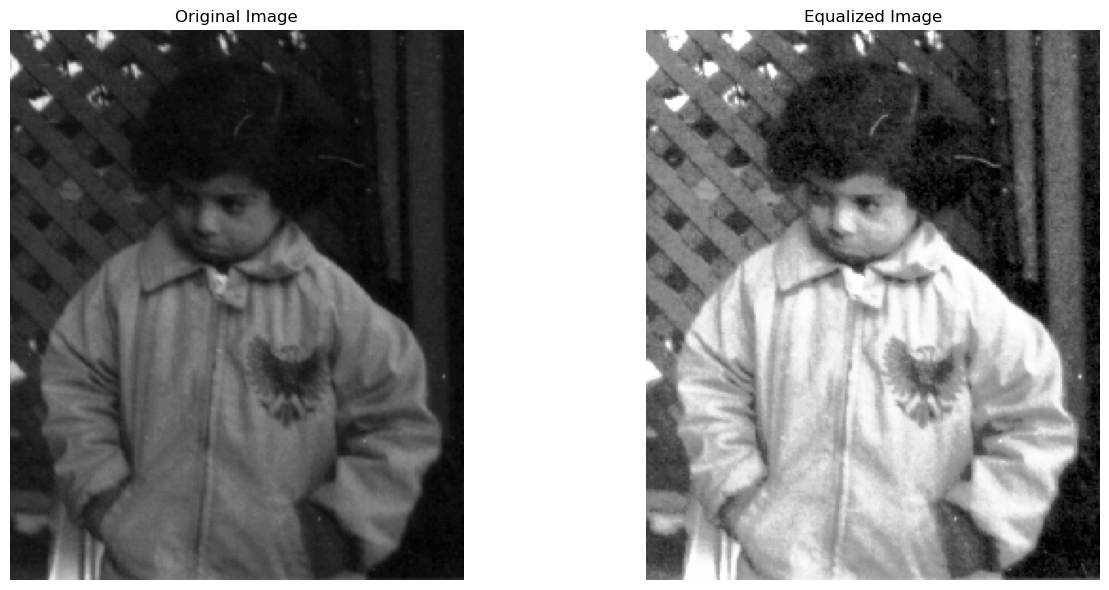

In [41]:
# 6. Side-by-side comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(img3, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img3, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()


.........................................

Problem-4: Unsharp Masking on moon.tiff

1. Read and display the original image in grayscale
We'll start by reading moon.tiff and displaying it using the show_image function.

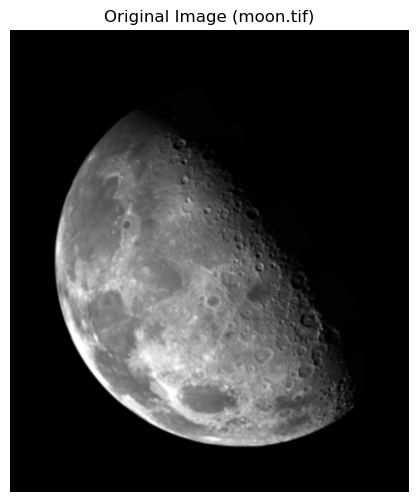

In [48]:
# Step 1: Read and display the original image
img4 = cv2.imread('moon.tif', cv2.IMREAD_GRAYSCALE)

if img4 is None:
    print("❌ Image 'moon.tif' not found. Please check the filename and directory.")
else:
    show_image(img4, title='Original Image (moon.tif)', cmap_type='gray')


2. Apply unsharp masking in the spatial domain

We use a Gaussian blur as the smoothing function.

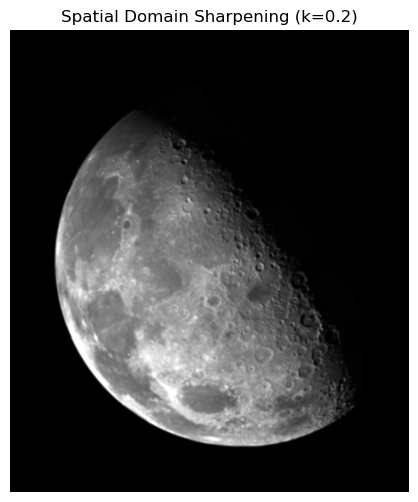

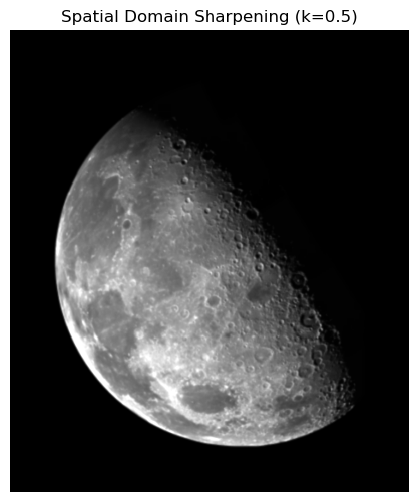

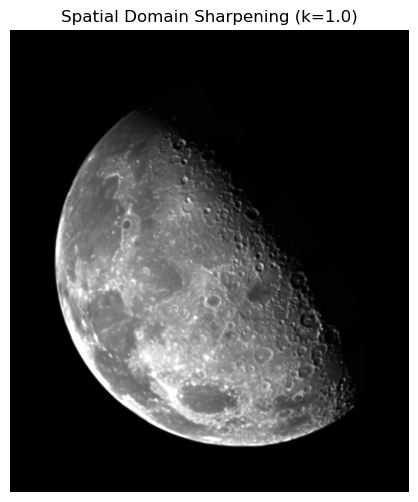

In [46]:
# Step 2: Unsharp masking in spatial domain
def spatial_unsharp_masking(img, k):
    blurred = cv2.GaussianBlur(img, (9, 9), 10)  # Gaussian for blur
    mask = cv2.subtract(img, blurred)
    sharpened = cv2.addWeighted(img, 1.0, mask, k, 0)
    return sharpened

# Try three values of k
k_values = [0.2, 0.5, 1.0]
spatial_results = []

for k in k_values:
    sharpened = spatial_unsharp_masking(img4, k)
    spatial_results.append(sharpened)
    show_image(sharpened, title=f'Spatial Domain Sharpening (k={k})', cmap_type='gray')


3. Apply unsharp masking in the frequency domain

We implement a Butterworth high-pass filter.

In [49]:
import numpy as np

def frequency_unsharp_masking(img, k, D0=40, n=2):
    M, N = img.shape
    u = np.arange(M)
    v = np.arange(N)
    u, v = np.meshgrid(u - M//2, v - N//2, indexing='ij')
    D = np.sqrt(u**2 + v**2)
    
    # Butterworth High-pass filter
    H_hp = 1 / (1 + (D0 / (D + 1e-5))**(2*n))  # Avoid division by zero

    # Fourier Transform
    F = np.fft.fft2(img)
    F_shifted = np.fft.fftshift(F)

    # Apply filter and unsharp formula
    G_shifted = (1 + k * H_hp) * F_shifted
    G = np.fft.ifftshift(G_shifted)
    g = np.fft.ifft2(G)
    g = np.abs(g)
    g = np.clip(g, 0, 255).astype(np.uint8)
    
    return g


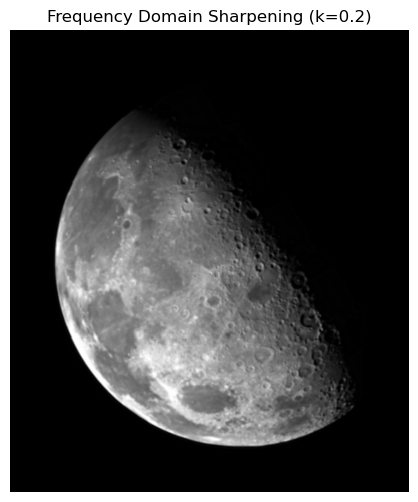

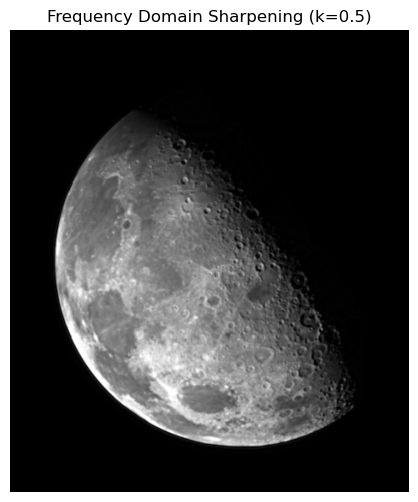

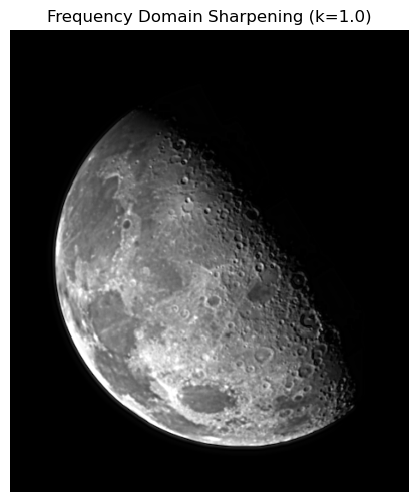

In [50]:
# Step 3: Apply frequency domain sharpening
frequency_results = []

for k in k_values:
    sharpened = frequency_unsharp_masking(img4, k, D0=40)
    frequency_results.append(sharpened)
    show_image(sharpened, title=f'Frequency Domain Sharpening (k={k})', cmap_type='gray')


4. Display spatial vs frequency results side-by-side

This step allows for easy visual comparison.

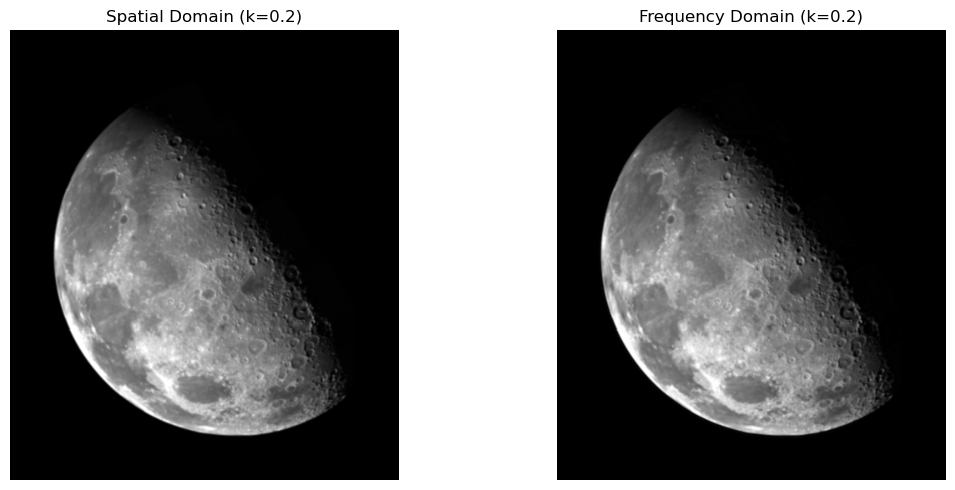

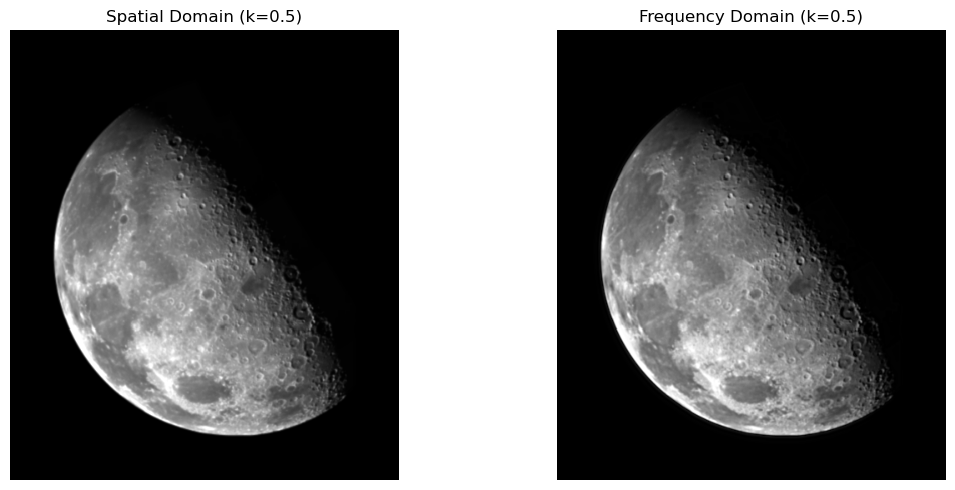

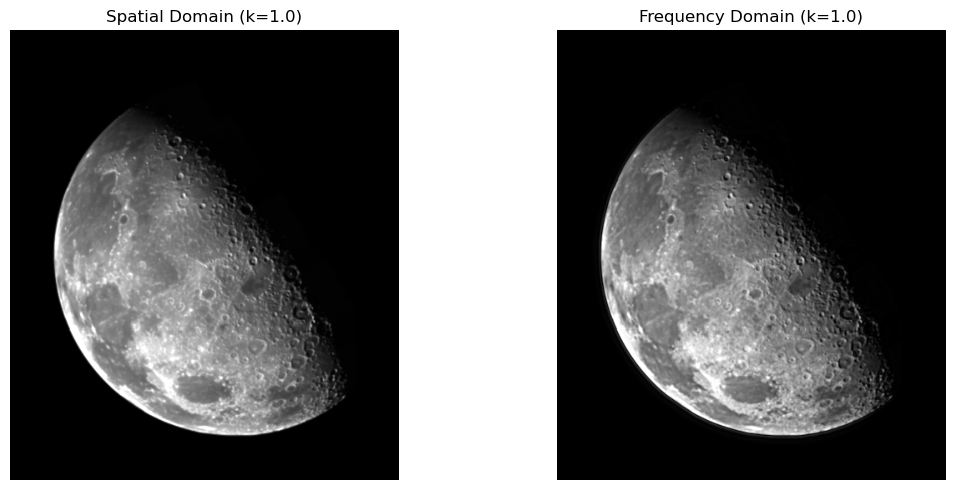

In [52]:
def compare_results(spatial_list, freq_list, k_vals):
    for i in range(len(k_vals)):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(spatial_list[i], cmap='gray')
        plt.title(f'Spatial Domain (k={k_vals[i]})')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(freq_list[i], cmap='gray')
        plt.title(f'Frequency Domain (k={k_vals[i]})')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

# Step 4: Side-by-side comparison
compare_results(spatial_results, frequency_results, k_values)


Problem-5: Noise Analysis and Removal on pcb.tiff

1. Read and display the original image in grayscale

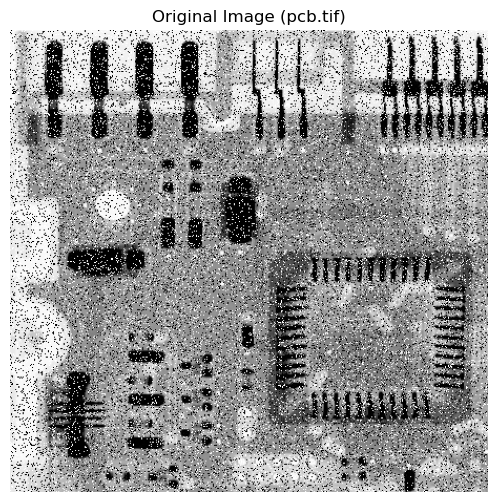

In [54]:
# Step 1: Read the PCB image in grayscale
img5 = cv2.imread('pcb.tif', cv2.IMREAD_GRAYSCALE)

if img5 is None:
    print("❌ Image 'pcb.tif' not found. Please check the filename or path.")
else:
    show_image(img5, title='Original Image (pcb.tif)', cmap_type='gray')


2. Identify the noise type using visual inspection and histogram analysis

We now examine the image for signs of noise and analyze the intensity distribution to guess the noise type.

Salt-and-pepper noise appears as sharp black-and-white dots.

Gaussian noise creates a smooth variation and looks like grain.

The histogram helps confirm our visual diagnosis.

python
Copy
Edit



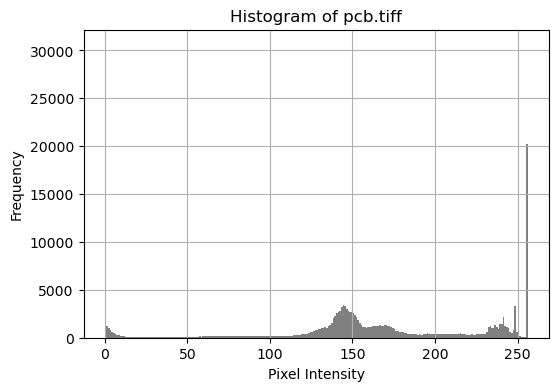

In [55]:
# Step 2: Analyze the noise visually and statistically (histogram)
if img5 is not None:
    # Show histogram
    plt.figure(figsize=(6, 4))
    plt.hist(img5.ravel(), bins=256, range=[0, 256], color='gray')
    plt.title("Histogram of pcb.tiff")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


If the image has a bimodal histogram with spikes near 0 and 255, it's likely salt-and-pepper noise.
If the histogram looks like a smooth bell curve, it's likely Gaussian noise.



3. Remove the noise using proper filtering
We'll choose a filter based on the identified noise:

If salt-and-pepper → use median filter (very effective).

If Gaussian noise → use Gaussian blur or bilateral filter.

3A. Try Median Filter (good for salt-and-pepper)

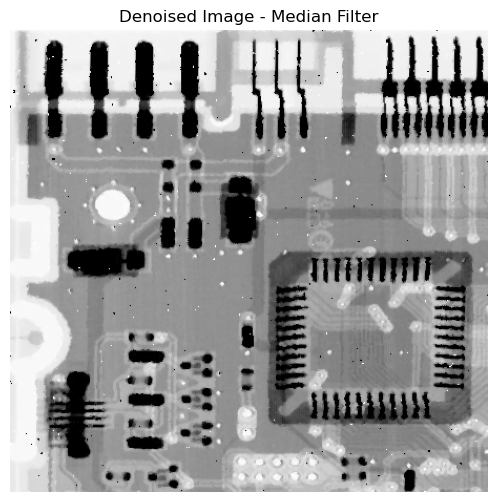

In [56]:
# Step 3A: Apply median filter
denoised_median = cv2.medianBlur(img5, 3)  # Kernel size can be 3, 5, etc.
show_image(denoised_median, title='Denoised Image - Median Filter')


3B. Try Gaussian Blur (good for Gaussian noise)



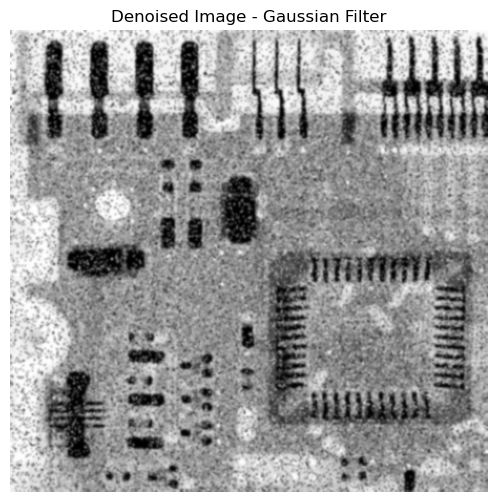

In [57]:

denoised_gaussian = cv2.GaussianBlur(img5, (5, 5), sigmaX=1)
show_image(denoised_gaussian, title='Denoised Image - Gaussian Filter')


3C. Try Bilateral Filter (preserves edges)

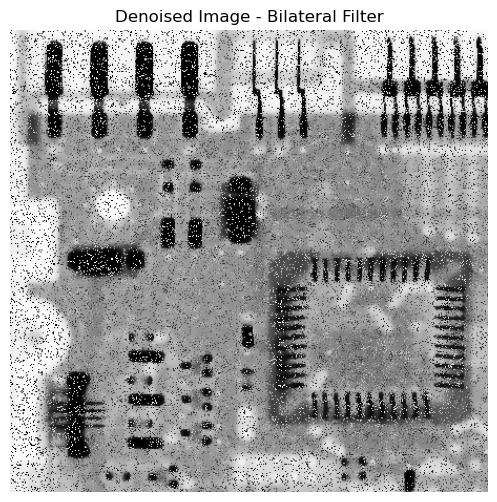

In [58]:

denoised_bilateral = cv2.bilateralFilter(img5, d=9, sigmaColor=75, sigmaSpace=75)
show_image(denoised_bilateral, title='Denoised Image - Bilateral Filter')


Problem-6: Enhancement of pollen.tiff Image

1. Read and display the original image in grayscale
We begin by reading and displaying the grayscale version of the image. This allows us to visually inspect any issues such as poor contrast, noise, blur, or lighting problems.

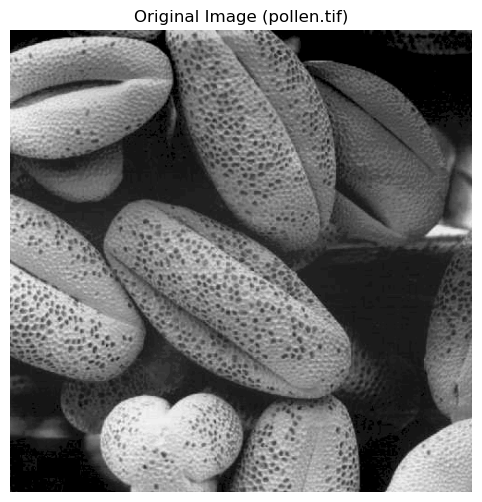

In [60]:
# Read the pollen image in grayscale
img6 = cv2.imread('pollen.tif', cv2.IMREAD_GRAYSCALE)

if img6 is None:
    print("❌ Image 'pollen.tif' not found.")
else:
    show_image(img6, title='Original Image (pollen.tif)', cmap_type='gray')


2. Comment on the image problem using visual/statistical evidence
Here we identify the issue — often, pollen.tiff may suffer from low contrast or uneven illumination. To analyze this:

We visually inspect the image.

We generate the histogram to examine intensity distribution.

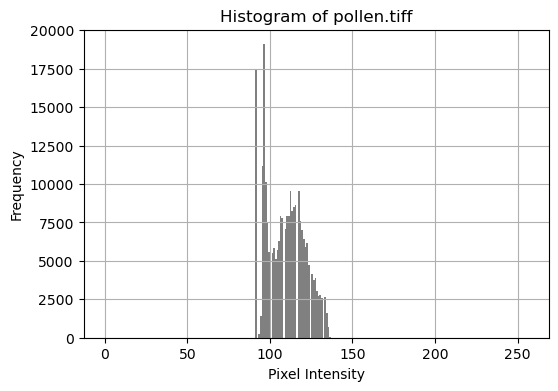

In [62]:
#  Histogram Analysis
if img6 is not None:
    plt.figure(figsize=(6, 4))
    plt.hist(img6.ravel(), bins=256, range=(0, 256), color='gray')
    plt.title("Histogram of pollen.tiff")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


If the histogram is narrow and centered, it indicates low contrast.
If the image looks dull or flat, that also confirms poor dynamic range.

Now enhance the image using two independent techniques
We will now apply two traditional enhancement techniques to solve the identified problem.



Approach 1: Histogram Equalization (Global Contrast Enhancement)

Histogram Equalization redistributes pixel intensities to stretch and balance contrast.

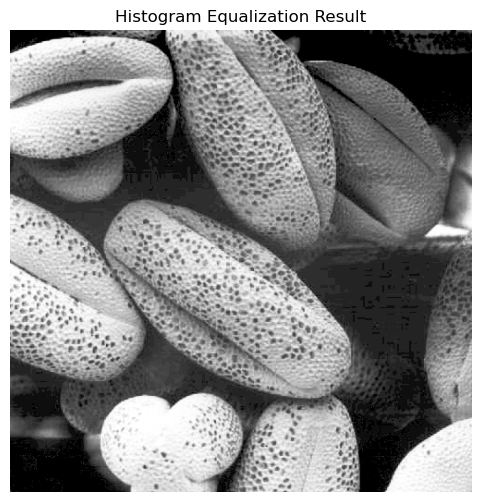

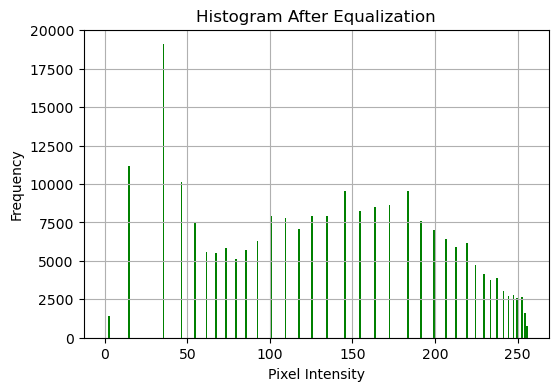

In [64]:
# Step 3: Apply Histogram Equalization
equalized_img = cv2.equalizeHist(img6)
show_image(equalized_img, title='Histogram Equalization Result')

# Histogram after equalization
plt.figure(figsize=(6, 4))
plt.hist(equalized_img.ravel(), bins=256, range=(0, 256), color='green')
plt.title("Histogram After Equalization")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Compare the histograms: The equalized one should be more spread out, indicating better contrast.

Visually, the image should appear sharper and more defined.

Approach 2: CLAHE (Contrast Limited Adaptive Histogram Equalization)

CLAHE is a # Step 4: Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(img6)
show_image(clahe_img, title='CLAHE Result')

# Histogram after CLAHE
plt.figure(figsize=(6, 4))
plt.hist(clahe_img.ravel(), bins=256, range=(0, 256), color='orange')
plt.title("Histogram After CLAHE")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
local enhancement method that prevents over-amplification of noise and is great for uneven lighting.

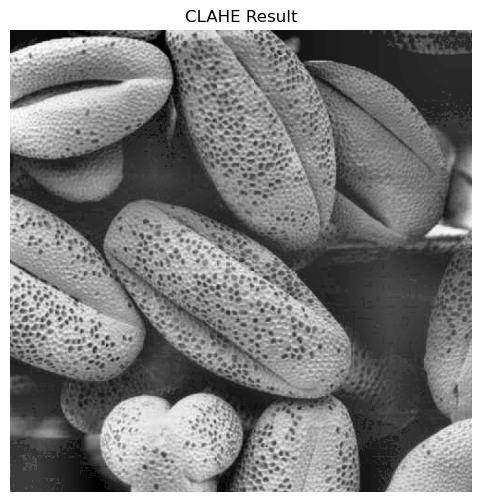

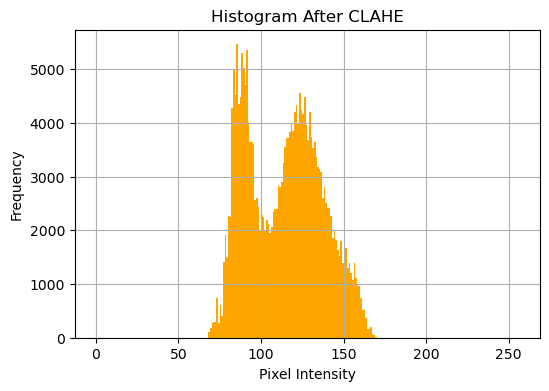

In [66]:
#Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(img6)
show_image(clahe_img, title='CLAHE Result')

# Histogram after CLAHE
plt.figure(figsize=(6, 4))
plt.hist(clahe_img.ravel(), bins=256, range=(0, 256), color='orange')
plt.title("Histogram After CLAHE")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


CLAHE preserves local contrast, especially in darker or brighter regions.

Histogram should show a more balanced spread, but not overly stretched like global equalization.

Useful in images where global methods fail to preserve detail in specific regions.

